This notebook performs a one-way ANOVA (Analysis of Variance) test to determine if there are significant differences in compensation across different job satisfaction levels using the `stack_overflow` dataset.

### 1\. Objective

The primary objective of this notebook is to statistically test whether the mean compensation is the same or different across various levels of job satisfaction.

### 2\. Hypotheses

  * **Null Hypothesis ($H\_0$):** The mean compensation is the same across different job satisfaction levels.
  * **Alternative Hypothesis ($H\_A$):** The mean compensation is different for at least one of the levels of job satisfaction.

### 3\. Libraries Used

The following Python libraries are imported for data manipulation, statistical analysis, and visualization:

  * `pandas` for data handling.
  * `pingouin` for statistical tests, specifically ANOVA and post-hoc tests.
  * `seaborn` for creating statistical graphics.
  * `matplotlib.pyplot` for plotting.

<!-- end list -->

### 4\. Data Loading

The significance level `alpha` is set to 0.05. The dataset `stack_overflow` is loaded from a feather file located at `'../../data/stack_overflow.feather'`.


The first 5 rows of the dataframe are displayed to inspect its structure and content:

```python
stack_overflow.head()
```

The shape of the dataset is also checked, showing (2261, 63), meaning 2261 rows and 63 columns:

```python
stack_overflow.shape
```


In [222]:
import pandas as pd
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt

In [223]:
alpha = 0.05
stack_overflow = pd.read_feather('../../data/stack_overflow.feather')

In [224]:
stack_overflow.head()

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,...,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
0,36.0,"I am not primarily a developer, but I write co...",Yes,34.0,30.0,adult,Yearly,60000.0,77556.0,United Kingdom,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,4.0,3.0,At least 30
1,47.0,I am a developer by profession,Yes,53.0,10.0,child,Yearly,58000.0,74970.0,United Kingdom,...,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43.0,28.0,At least 30
2,69.0,I am a developer by profession,Yes,25.0,12.0,child,Yearly,550000.0,594539.0,France,...,Too short,No,"Computer science, computer engineering, or sof...",Django;Flask,Django;Flask,Just as welcome now as I felt last year,40.0,13.0,3.0,Under 30
3,125.0,"I am not primarily a developer, but I write co...",Yes,41.0,30.0,adult,Monthly,200000.0,2000000.0,United States,...,Appropriate in length,No,None,None,None,Just as welcome now as I felt last year,40.0,11.0,11.0,At least 30
4,147.0,"I am not primarily a developer, but I write co...",No,28.0,15.0,adult,Yearly,50000.0,37816.0,Canada,...,Appropriate in length,No,"Another engineering discipline (such as civil,...",None,Express;Flask,Just as welcome now as I felt last year,40.0,5.0,3.0,Under 30


In [225]:
stack_overflow.shape

(2261, 63)

### 5\. Key Variables

The key variables for this ANOVA test are:

  * **Independent Variable (Factor):** `job_sat` (Job Satisfaction), which is a categorical variable with five levels: "Very satisfied", "Slightly satisfied", "Slightly dissatisfied", "Neither", and "Very dissatisfied".
  * **Dependent Variable:** `converted_comp` (Converted Compensation), which is a continuous numerical variable representing compensation.
### 6\. Data Exploration

The distribution of the `job_sat` variable is examined using `value_counts()` to see the number of respondents in each satisfaction category

In [227]:
#This dataset includes a job satisfaction variable, with five categories from "Very satisfied" down to "Very dissatisfied".
stack_overflow['job_sat'].value_counts()

job_sat
Very satisfied           879
Slightly satisfied       680
Slightly dissatisfied    342
Neither                  201
Very dissatisfied        159
Name: count, dtype: int64

### 7\. Visualizations

A box plot is generated to visually compare the distribution of `converted_comp` across different `job_sat` categories. This helps to visually inspect potential differences in means and spread before performing the statistical test.

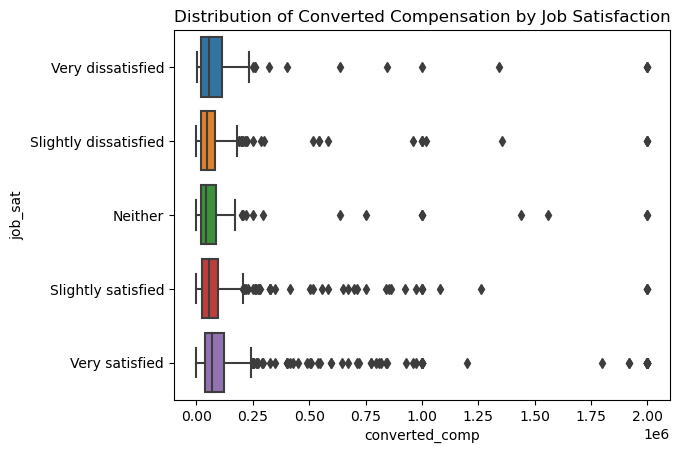

In [229]:
sns.boxplot(data=stack_overflow, y='job_sat', x='converted_comp')
plt.title('Distribution of Converted Compensation by Job Satisfaction')
plt.show()

### 8\. ANOVA Test

A one-way ANOVA test is performed using `pingouin.anova()`.

  * `dv`: The dependent variable (`converted_comp`).
  * `between`: The independent (grouping) variable (`job_sat`).
  * `detailed=True`: Provides detailed ANOVA table.

The result of the ANOVA test is printed, showing statistics like Degrees of Freedom (DF), F-value, p-value, and effect size (np2).

In [231]:
# We will be using pingouin anova method to compare values across  multiple groups. 
# We specify the data as stack_overflow, the dependent variable, dv, as converted_comp, and the column of groups to calculate between as job_sat.

anova_results = pg.anova(data=stack_overflow, dv='converted_comp', between='job_sat')
print(anova_results)


    Source  ddof1  ddof2         F     p-unc       np2
0  job_sat      4   2256  4.480485  0.001315  0.007882


### 9\. Post-Hoc Tests

If the p-value from the ANOVA test is less than the `alpha` (0.05), it indicates a significant difference between at least two groups. In such cases, post-hoc tests are performed using `pingouin.pairwise_tests()` to identify which specific pairs of groups have statistically significant differences. The Bonferroni correction (`padjust='bonf'`) is applied to adjust p-values for multiple comparisons, reducing the chance of Type I errors.


In [233]:
# explain dd0f1 - Number of categories (job_cat) - 1
# explain dd0f2 - Total number of records - number of job_cat

p_value = anova_results['p-unc'][0]
print(f"p-value: {p_value:.4f}")

# If the ANOVA is significant (p < alpha), perform post-hoc tests
if p_value < alpha:
    posthoc_results = pg.pairwise_tests(data=stack_overflow, dv='converted_comp', between='job_sat', padjust='bonf')
    print("\nPost-hoc tests:\n")
    print(posthoc_results.head(10).sort_values('p-unc'))
else:
    print("\nANOVA was not significant. No post-hoc tests performed.")


p-value: 0.0013

Post-hoc tests:

  Contrast                      A                      B  Paired  Parametric  \
9  job_sat     Slightly satisfied         Very satisfied   False        True   
6  job_sat  Slightly dissatisfied         Very satisfied   False        True   
8  job_sat                Neither         Very satisfied   False        True   
2  job_sat      Very dissatisfied     Slightly satisfied   False        True   
0  job_sat      Very dissatisfied  Slightly dissatisfied   False        True   
3  job_sat      Very dissatisfied         Very satisfied   False        True   
7  job_sat                Neither     Slightly satisfied   False        True   
4  job_sat  Slightly dissatisfied                Neither   False        True   
1  job_sat      Very dissatisfied                Neither   False        True   
5  job_sat  Slightly dissatisfied     Slightly satisfied   False        True   

          T          dof alternative     p-unc    p-corr p-adjust     BF10  \
9 -4.00

In [234]:
posthoc_results[posthoc_results['p-unc'] < alpha]

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
6,job_sat,Slightly dissatisfied,Very satisfied,False,True,-3.076222,821.303063,two-sided,0.002166,0.021659,bonf,7.43,-0.173247
9,job_sat,Slightly satisfied,Very satisfied,False,True,-4.009935,1478.622799,two-sided,0.000064,0.000638,bonf,158.564,-0.192931


### 10\. Interpretation
  * **ANOVA Results:** `p-unc` (0.0013) from the `aov_results` table is less than 0.05, and hence we reject the null hypothesis. This means there is a statistically significant difference in mean compensation among at least two job satisfaction levels.
  * **Post-Hoc Results:** post-hoc tests are performed, the `p-unc` or `p-corr` (corrected p-value) columns in the `posthoc_results` table indicate which specific pairs of job satisfaction levels have significantly different mean compensations. A `p-corr` value less than 0.05 for following pair suggesting a significant difference between those two groups.
     - Slightly Dissatisfied , Very satisfied
     - Slightly satisfied, Very satisfied